### Q1.  In no more than a paragraph, outline your final project. What question are you looking to answer?  What text are you using?  With whom are you working? (Note:  you will not be strictly held to this description since there are still techniques that we will cover in class. This is meant to get people thinking about how to get started more than a week before the project is due.) (5 pts.)

I'm working with Paxton Butler. We are using Presidential Candidates debates to predict how they will react for the upcoming presidential candidates debates in the future. For instance, considering all the Donald Trump past debates to analyze how he reacts on particular topic and using these results to predict how he reacts in the future on certain topics.

In [1]:
#annoying bit about python: lack of native floating point division
from __future__ import division

#### I'm scrapping the same text compared to the previous assignment, these are some of the comments on a seafood brand - 'Red Lobster' from Yelp.com and pedicting the sentiments using different models

In [2]:
from urllib import urlopen
import pandas as pd
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', 1250) #important for getting all the text

In [3]:
#Looping
def spider(max_pages):
    page = 0
    html = BeautifulSoup().findAll() # initiate variable as a bs4 result set outside of while loop 
    while page <= max_pages:
        theurl = "http://www.yelp.com/biz/red-lobster-new-york-2?start=" + str(page)
        source_code = requests.get(theurl)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text)
        html = html + soup.findAll("div",{"class":"review-content"} )
        page = page + 20
    return html

In [4]:
# function to pick the data
def toDataFrame(html):
    DataSet = pd.DataFrame()
    DataSet['comment'] = [comments.find('p').text for comments in html]
    DataSet['date'] = [comments.find('span').text.replace('\n','').replace(' ','') for comments in html]
    return DataSet

In [6]:
#Pass the list to the above function to create a DataFrame
data_frame = toDataFrame(spider(500))

In [7]:
print data_frame.shape

(391, 2)


In [8]:
data_frame.head(10)
data_frame.to_csv("final1.csv", encoding='utf-8')

In [9]:
pathname = "C:/Anaconda2/AText Mining/Week 5/Assignment 5/"
filename = pathname+"final1.csv"
reviewdf = pd.read_csv(filename, index_col = 0) 
print reviewdf.shape
reviewdf.head(2)

(391, 2)


,comment,date
0,"Ugh, you guys made me so happy tonight and don't even know it. I wanted to keep it simple tonight and went for Red Lobster in Times Square. It was also one of the restaurants close to Port Authority. If I can give anyone advice, it would be to sit at the bar, you'll get your food faster. But I also visited after hours so there was barely anyone there. Based on the receipt, my waitress was Doly? Girl, thank you! She was so sweet and kind and her partner was also. He (I didn't get his name) actually suggested the mojito for me because I had not tried it before and low and behold! It tasted exactly like my grandma's lemonade. So either they didn't make it right or my grandma has been sneaking in some good stuff and trying to get us tipsy all along. *scratches head* Either way, I loved it. The only thing I'm kinda not happy about was my $45 tab. Like. Really. I was by myself. How did I do that? Trust me when I tell you that I suck at saving and never mind the fact that food is my life.. I will spend my entire paycheck at one restaurant. Trust and believe me! Anyway, thank you Red Lobster.. For being there when I needed you the most and for taking all my money.",5/6/2016
1,"I was here with my friend because we were in the area and needed to kill time before our next move. Long story short, I saw a mouse scurry across the room. I didn't want to make a big deal of it. I told the waiter. Literally nothing was done. He didn't update us saying he'd told the manager about it or ask me any additional questions at all. He just said ""okay"". Like....I am in your restaurant telling you I just saw a mouse. This was in the early evening (4 ish) and was not busy at all. He just really lacked customer service. I definitely will not be returning here.",5/19/2016


### Sentiment Analysis using Afinn

In [10]:
#some dictionaries assign a value - like the positivity measure in the reviews 
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open(pathname+"AAFINN-111.txt") ]))
print type(afinn), len(afinn)
for key, value in sorted(afinn.items())[0:5]:
    print key + " => " + str(value)
print "~~~~~~~~~~~~"
for key, value in sorted(afinn.items())[2472:]:
    print key + " => " + str(value)

<type 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
~~~~~~~~~~~~
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [11]:
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative Comment'
    elif (sentcount >0):
        sentiment = 'Positive Comment'
    else:
        sentiment = 'Neutral Opinion'
    
    return sentiment
    #return sentcount

In [12]:
reviewdf['afinn'] = map(lambda x: afinn_sent(x), reviewdf['comment'])
reviewdf.iloc[310:312][['comment','afinn']]

,comment,afinn
310,"I went there last week, ordered the surf and turf. The steak was decent a little chewy but tasted good, the lobster was pure rubber. Not let me talk about the potatoes. To start they were cold, the first piece was fine, cold but fine. The second piece felt like a sponge, releasing water (at least I hope) as I pressed between my teethes. This made me nauseous at least by this time I was almost done with my meal.I won't come back to this place again.",Positive Comment
311,"With family in town with a hunger for seafood at a decent price, we headed to Red Lobster in Times Square. We went for lunch on a Wednesday afternoon, around 12:30 P.M. There were a decent number of people on the upper floor where we sat, but there was no wait time. As expected, the prices were about $5-$6 more a plate than what you would expect to pay in a typical suburban Red Lobster. Our waiter was friendly enough, though it did take a decent amount of time to get our drinks. It really wasn't possible to get his attention during the meal, so we weren't able to get the infamous cheesy biscuits refilled. He came by at one point and said our order was up and he would be bring it by in just a minute. About 10 minutes later, he showed up with the food. Hmm...?As for the meal, the food was what you would expect to find in any Red Lobster. If you're a fan of fried shrimp, buttery lobster, or grilled fish, you'll probably be happy with your selection. As other reviewers have noted, they do add an automatic 18% tip to the bill. I jokingly told my dad (who picked up the tab) not to tip well, since the server was pretty MIA during the meal. He's an excellent tipper and said, ""Too bad for the waiter, he'd have received a better tip fro...",Positive Comment


### T1. Create a simple bag of words (with all lowercase and no stop words) using your dataset. Identify the labels you will be trying to predict. Proceed to create a train test split of 60/40. 
Trying to predict sentiment using the bag of words by splitting data into 60:40 for testing the model. Initializing a simple vector space with No lower case and removing stop words

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# quick peak at unmunged feature space

prelim = CountVectorizer(binary=False, lowercase = False, stop_words = 'english') 
prelim_dm = prelim.fit_transform(reviewdf['comment'])
print prelim_dm.shape

names = prelim.get_feature_names()
print type(names), len(names)

count = np.sum(prelim_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(by=['count'], ascending = False).head(5)

(391, 4722)
<type 'list'> 4722
<type 'list'> 4722


,count
The,412
food,327
Lobster,307
Red,297
good,250


In [14]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = prelim_dm.toarray()  #remember this is the output from the vectorizer
print type(X)


y = reviewdf['afinn'].values #this is an array of labels
print type(y)

print y[0:5]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive Comment' 'Negative Comment' 'Positive Comment'
 'Positive Comment' 'Positive Comment']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(234L, 4722L)
(157L, 4722L)
(234L,)
(157L,)


In [16]:
#so what are we working with?
# We calculated sentiment indexes from the text
print reviewdf['comment'][0:1]
print "~~~~~~~~~~~~"
print reviewdf['afinn'][0:1]
print "~~~~~~~~~~~~~"
#we created numeric representations of the text 
print pd.DataFrame(X,columns = prelim.get_feature_names())[0:1]

#now we're going to use the feature space to try to predict the labels

0    Ugh, you guys made me so happy tonight and don't even know it. I wanted to keep it simple tonight and went for Red Lobster in Times Square. It was also one of the restaurants close to Port Authority. If I can give anyone advice, it would be to sit at the bar, you'll get your food faster. But I also visited after hours so there was barely anyone there. Based on the receipt, my waitress was Doly? Girl, thank you! She was so sweet and kind and her partner was also. He (I didn't get his name) actually suggested the mojito for me because I had not tried it before and low and behold! It tasted exactly like my grandma's lemonade. So either they didn't make it right or my grandma has been sneaking in some good stuff and trying to get us tipsy all along. *scratches head* Either way, I loved it. The only thing I'm kinda not happy about was my $45 tab. Like. Really. I was by myself. How did I do that? Trust me when I tell you that I suck at saving and never mind the fact that food is my life

### T2. Using default model parameters, fit 3 classifiers (decision tree, naïve bayes, and logistic regression) to your dataset and subsequently generate predictions (just like we did in class). Feel free to set a random state variable where appropriate to facilitate replication

Ref: https://www.quora.com/In-a-decision-tree-how-do-we-select-which-attribute-to-split-the-data-by-at-each-level
Ref: https://www.quora.com/In-laymans-terms-how-does-Naive-Bayes-work

### Q2. In your own words, describe the significance of the test dataset. What does the distribution of your target variable look like?  Describe what the 3 classifiers are doing differently and explain how that might affect the predictions. Which model would you expect to have the best performance? (5 pts)

Test data set is created by Random Seed with 60:40 split, the above chart shows the overall distributions of sentiments. It says Positive Comments are more dominated by Negative Comments and followed by Neutral. 

List below are the 3 Methods used for Classification:

##### A. Decision Trees:

1. Compute entropy and info gain for each attribute.
2. Sort the attributes in ascending order w.r.t. entropy (descending order for info gain)
3. While attribute list is not empty or length (attribute list)>threshold, select the first attribute to be the root of the tree/subtree. 
4. Remove the attribute from the sorted list.
5. Go to step 3

##### B. Naive Bayes (Bayesian classifier):
1. Assumptions: Naive model: a model that assumes that each independent variable is not affected by anything else, and that the value for the interaction between the independent and dependent variable is not related to the presence of anything else.

##### C. Logistic Regression: 
1. Helps in predicting the categorical output data with the probability of the event occurring (In our case, probability of Positive Comment, Negative (or) Neutral Comment, higher the probability, the out will be classified accordingly)

I would have to run, to check how these model behaves, but for these Multinomial classification I would go with Decision Trees for classification.

### T1. Create a simple bag of words (with all lowercase and no stop words) using your dataset. Identify the labels you will be trying to predict. Proceed to create a train test split of 60/40. 
Trying to predict sentiment using the bag of words by splitting data into 60:40 for testing the model. Initializing a simple vector space with No lower case and removing stop words

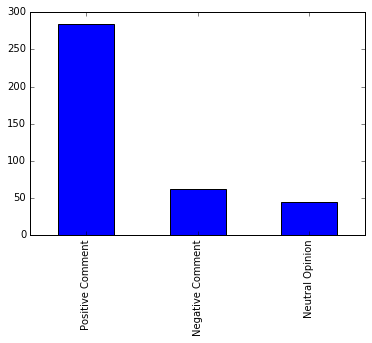

In [17]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
reviewdf['afinn'].value_counts().plot(kind='bar')

## 1.  Decision Tree

In [18]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_pre = DecisionTreeClassifier(random_state = 50)
DecisionTree_pre.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = DecisionTree_pre.predict(X_test)


print DecisionTree_pre.score(X_test,y_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.668789808917
accuracy: 0.668789808917
             precision    recall  f1-score   support

Negative Comment       0.28      0.55      0.37        20
Neutral Opinion       0.30      0.14      0.19        22
Positive Comment       0.84      0.79      0.82       115

avg / total       0.70      0.67      0.67       157



## 2. Naive Bayes

In [19]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_pre = MultinomialNB()
print NaiveBayes_pre
NaiveBayes_pre.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = NaiveBayes_pre.predict(X_test)

print NaiveBayes_pre.score(X_test, y_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.738853503185
accuracy: 0.738853503185
             precision    recall  f1-score   support

Negative Comment       0.33      0.10      0.15        20
Neutral Opinion       0.00      0.00      0.00        22
Positive Comment       0.76      0.99      0.86       115

avg / total       0.60      0.74      0.65       157



## 3. Logistic Regression

In [20]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_pre = LogisticRegression(random_state = 50)
print logit_pre
logit_pre.fit(X_train, y_train)
print logit_pre.score(X_test, y_test)

# make predictions
clf3_expected = y_test
clf3_predicted = logit_pre.predict(X_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.732484076433
accuracy: 0.732484076433
             precision    recall  f1-score   support

Negative Comment       0.33      0.20      0.25        20
Neutral Opinion       0.33      0.09      0.14        22
Positive Comment       0.78      0.95      0.86       115

avg / total       0.66      0.73      0.68       157



### T3. Assess the performance of the models using any of the measures (confusion matrices, precision, recall, f1-score, and accuracy)
By comparing the Accuracy of the different models, Naive Bayes is doing better over the other two model. In fact, Naive Bayes and Logistics Regression models have almost gives the same accurate results.

### Confusion Matrix

### Q3. What information is the confusion matrix conveying? What would be indicative of good performance? (5 pts)

Confusion Matrix gives the details of classification and Miss Classification. The accuracy is good indicative of good indicator on performance. Below matrix should how the 3 models are performing with Accuracy Scores.

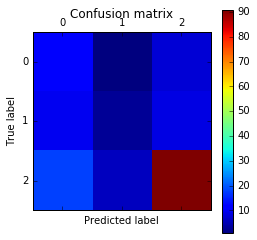

[[11  1  8]
 [10  3  9]
 [18  6 91]]
0.668789808917


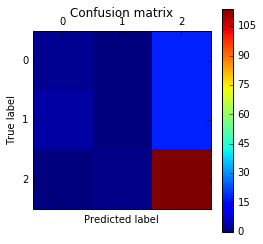

[[  2   0  18]
 [  4   0  18]
 [  0   1 114]]
0.738853503185


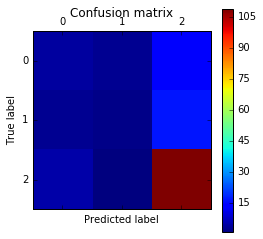

[[  4   3  13]
 [  3   2  17]
 [  5   1 109]]
0.732484076433


In [21]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    cm_accuracy =  metrics.accuracy_score(t1,t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)
    print  (cm_accuracy)

create_cm(clf1_expected, clf1_predicted)
create_cm(clf2_expected, clf2_predicted)
create_cm(clf3_expected, clf3_predicted)

### T4. Create a new dataframe called ‘model_performance’ with 3 columns (model_name, processing/parameters, model_accuracy) and append the name of the model, a short description of what preprocessing or parameter settings you used, and the model’s accuracy after each run.

In [22]:
df =""
columns = ['Model NO', 'Name', 'Processing Parameters','Model Accuracy']
df = pd.DataFrame(columns=columns) 
df.loc[len(df)]=['Model 1','Prelim_Reviews_Decision Tree','binary=False, lowercase = False, stop_words = "english"',
                 DecisionTree_pre.score(X_test,y_test)]
df.loc[len(df)]=['Model 2','Prelim_Reviews_Naive Bayes','binary=False, lowercase = False, stop_words = "english"',
                 NaiveBayes_pre.score(X_test, y_test)]
df.loc[len(df)]=['Model 3','Prelim_Reviews_Logistic Regression','binary=False, lowercase = False, stop_words = "english"',
                 NaiveBayes_pre.score(X_test, y_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
1,Model 2,Prelim_Reviews_Naive Bayes,"binary=False, lowercase = False, stop_words = ""english""",0.738854
2,Model 3,Prelim_Reviews_Logistic Regression,"binary=False, lowercase = False, stop_words = ""english""",0.738854
0,Model 1,Prelim_Reviews_Decision Tree,"binary=False, lowercase = False, stop_words = ""english""",0.668790


### Q4. Which model performed the best? Was it the same model that you had initially suspected? (5 pts)
Model with Naive Bayes is performing better over the other two models. Initially I thought Decision Tree could perform better in classification of multiple category.

### Dictionary to replace Item names, Cities, Restaurnt names etc..

In [23]:
# replace contractions
import re

# using dictionaries

RLobster_dict = { 'chilled jumbo shrimp cocktail':'cjshrimp','parrot isle jumbo coconut shrimp':'pijcoco',
                  'crispy shrimp lettuce wraps':'cslr', 'blueberry balsamic dressing':'bbdressing', 
                  'brown butter scampi':'bbscampi', 'cheddar bay biscuits': 'cbiscuits', 'jumbo coconut shrimp':'coco-shrimp',
                  'bubba gump shrimp':'shrimp','red lobster':'rlob' ,
                  'cheesy biscuits': 'cbiscuits', 'cheddar biscuits': 'cbiscuits', 'main course': 'mcourse', 
                  'endless shrimp':'eshrimp', 'coconut shrimp':'coco-shrimp', 'lobster pizza':'lpizza' , 
                  'shrimp linguini':'shrimp-linguini', 'crab linguini':'shrimp-linguini', 'shrimp scampi' : 'shrimp', 
                  'fried shrimp':'shrimp', 'shrimp alfredo':'shrimp','stuffed mushrooms':'mashroom', 
                 'shrimp cocktail':'cocktail', 
                  'caesar salad':'salad','pina colada':'pcolada','crab legs':'crab', 'new yorker': 'NYC', 
                 'ice cream':'ice-cream',  
                  'lobster tacos':'tocos', 'lobster tails':'ltails','mozzarella sticks':'mozzsticks', 
                 'mahi tacos':'tocos',
                  'lobster spinach dip':'lobspindip',  'jumbo fried shrimp':'jfshrimp','stuffed lobster tail':'slobtail', 
                  'sunset pina colada':'spcolada', 'shrimp alfredo pasta':'sapasta', 'crab cakes':'CC',
                 'Crowne Plaza hotel':'cphotel',
                 'grilled lobster':'glob', 'the ultimate feast':'Ultfest', 'meatier crab legs':'mcleg', 
                 'maine lobster tails': 'mltail', 'whipped cream':'wcream', 'Baked potato':'bakedpot', 
                 'garden salad':'gsalad', 
                 'chopped tomato':'ctomato', 'malibu hurricane':'mhurri' , 'iceberg lettuce':'icelettuce', 
                 'fried shrimp':'shrimp',
                 'times square':'tsqr', 'times sq':'tsqr', 'new yorker':'nyc','new york':'nyc',
                 'ruby tuesday':'rtues', 'olive garden':'oliveG', 'outback steakhouse':'obsteak', 
                 'strawberry pina colada': 'spcolada', 'endless shrimp promotion':'espromation', 
                 'lobster + sirloin combo':'lscombo'}


def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)



In [24]:
reviewdf['cleantext'] = map(lambda x: multiple_replace(RLobster_dict, x), reviewdf['comment'])
reviewdf[7:8] 

,comment,date,afinn,cleantext
7,"We had booked table half day in advance but were placed in an freezing cold corner. We refused to give tips, which made waiter very irritating. Sad sad, since lobster and shrimps were fresh and well prepared.",7/5/2016,Negative Comment,"we had booked table half day in advance but were placed in an freezing cold corner. we refused to give tips, which made waiter very irritating. sad sad, since lobster and shrimps were fresh and well prepared."


### Customizing stopwords

In [25]:
from sklearn.feature_extraction import text 

skl_stopwords = text.ENGLISH_STOP_WORDS
print type(skl_stopwords)
print len(skl_stopwords)
print(skl_stopwords)

<type 'frozenset'>
318
frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above',

In [26]:
#(['cannot', 'never', 'won', 'shouldn', 'couldn', 'mightn', 'couldn', 'don'])
b = set(skl_stopwords)

# sets can be more forgiving than lists
print len(b)
keepwords = set(['cannot', 'never', 'won', 'shouldn', 'couldn', 'mightn', 'couldn','before','after'])
my_stopwords = b - keepwords
print len(my_stopwords)

318
314


In [27]:
#some dictionaries assign a value - like the positivity measure in the reviews 
afinn = dict(map(lambda (k,v): (k,int(v)), [ line.split('\t') for line in open(pathname+"AAFINN-111.txt") ]))
print type(afinn), len(afinn)
for key, value in sorted(afinn.items())[0:5]:
    print key + " => " + str(value)
print "~~~~~~~~~~~~"
for key, value in sorted(afinn.items())[2472:]:
    print key + " => " + str(value)

<type 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
~~~~~~~~~~~~
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [28]:
def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word in afinn:
            sentcount = sentcount + afinn[word]
            
    
    if (sentcount < 0):
        sentiment = 'Negative Comment'
    elif (sentcount >0):
        sentiment = 'Positive Comment'
    else:
        sentiment = 'Neutral Opinion'
    
    return sentiment
    #return sentcount

In [29]:
reviewdf['afinn1'] = map(lambda x: afinn_sent(x), reviewdf['cleantext'])
reviewdf.iloc[310:312][['comment','afinn','afinn1']]

,comment,afinn,afinn1
310,"I went there last week, ordered the surf and turf. The steak was decent a little chewy but tasted good, the lobster was pure rubber. Not let me talk about the potatoes. To start they were cold, the first piece was fine, cold but fine. The second piece felt like a sponge, releasing water (at least I hope) as I pressed between my teethes. This made me nauseous at least by this time I was almost done with my meal.I won't come back to this place again.",Positive Comment,Positive Comment
311,"With family in town with a hunger for seafood at a decent price, we headed to Red Lobster in Times Square. We went for lunch on a Wednesday afternoon, around 12:30 P.M. There were a decent number of people on the upper floor where we sat, but there was no wait time. As expected, the prices were about $5-$6 more a plate than what you would expect to pay in a typical suburban Red Lobster. Our waiter was friendly enough, though it did take a decent amount of time to get our drinks. It really wasn't possible to get his attention during the meal, so we weren't able to get the infamous cheesy biscuits refilled. He came by at one point and said our order was up and he would be bring it by in just a minute. About 10 minutes later, he showed up with the food. Hmm...?As for the meal, the food was what you would expect to find in any Red Lobster. If you're a fan of fried shrimp, buttery lobster, or grilled fish, you'll probably be happy with your selection. As other reviewers have noted, they do add an automatic 18% tip to the bill. I jokingly told my dad (who picked up the tab) not to tip well, since the server was pretty MIA during the meal. He's an excellent tipper and said, ""Too bad for the waiter, he'd have received a better tip fro...",Positive Comment,Positive Comment


In [30]:
my_tab = pd.crosstab(index=reviewdf['afinn'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
afinn,
Negative Comment,62
Neutral Opinion,45
Positive Comment,284


In [31]:
my_tab1 = pd.crosstab(index=reviewdf['afinn1'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab1

col_0,count
afinn1,
Negative Comment,63
Neutral Opinion,37
Positive Comment,291


In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate vectorizer(s)
cv1 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.95, 
                     min_df=0.003,
                     ngram_range = (1,2)) 
tfidf1 = TfidfVectorizer(lowercase=True, 
                        stop_words= my_stopwords, 
                        max_df=0.95, 
                        min_df=0.003,
                        ngram_range = (1,2)) 

# fit and transform text
cv_dm = cv1.fit_transform(reviewdf['cleantext'])
tfidf_dm = tfidf1.fit_transform(reviewdf['cleantext'])

# print matrix shape(s)
print cv_dm.shape
print tfidf_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(by= ['count'], ascending = False).head(5)

(391, 3151)
(391, 3151)
<type 'list'> 3151
<type 'list'> 3151


,count
food,350
rlob,327
good,270
shrimp,239
time,191


In [33]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X1 = cv_dm.toarray()  #remember this is the output from the vectorizer
print type(X)


y1 = reviewdf['afinn1'].values #this is an array of labels
print type(y1)

print y[0:5]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive Comment' 'Negative Comment' 'Positive Comment'
 'Positive Comment' 'Positive Comment']


In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X1_train.shape
print X1_test.shape
print y1_train.shape
print y1_test.shape

(234L, 3151L)
(157L, 3151L)
(234L,)
(157L,)


## 4.  Decision Tree

In [35]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_clean = DecisionTreeClassifier(random_state = 50)
DecisionTree_clean.fit(X1_train, y1_train)

# make predictions
#clf1_expected = y1_test
#clf1_predicted = DecisionTree_clean.predict(X1_test)


print DecisionTree_clean.score(X1_test,y1_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.656050955414
accuracy: 0.668789808917
             precision    recall  f1-score   support

Negative Comment       0.28      0.55      0.37        20
Neutral Opinion       0.30      0.14      0.19        22
Positive Comment       0.84      0.79      0.82       115

avg / total       0.70      0.67      0.67       157



## 5. Naive Bayes

In [36]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_clean = MultinomialNB()
print NaiveBayes_clean
NaiveBayes_clean.fit(X1_train, y1_train)

# make predictions
clf2_expected = y1_test
clf2_predicted = NaiveBayes_clean.predict(X1_test)

print NaiveBayes_clean.score(X1_test, y1_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.777070063694
accuracy: 0.777070063694
             precision    recall  f1-score   support

Negative Comment       0.50      0.33      0.40        21
Neutral Opinion       0.00      0.00      0.00        15
Positive Comment       0.81      0.95      0.87       121

avg / total       0.69      0.78      0.73       157



## 6. Logistic Regression

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_clean = LogisticRegression(random_state = 50)
print logit_clean
logit_clean.fit(X1_train, y1_train)
print logit_clean.score(X1_test, y1_test)

# make predictions
clf3_expected = y1_test
clf3_predicted = logit_clean.predict(X1_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.764331210191
accuracy: 0.764331210191
             precision    recall  f1-score   support

Negative Comment       0.40      0.29      0.33        21
Neutral Opinion       0.50      0.13      0.21        15
Positive Comment       0.81      0.93      0.86       121

avg / total       0.73      0.76      0.73       157



In [38]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X2 = tfidf_dm.toarray()  #remember this is the output from the vectorizer
print type(X)


y2 = reviewdf['afinn1'].values #this is an array of labels
print type(y)

print y[0:5]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive Comment' 'Negative Comment' 'Positive Comment'
 'Positive Comment' 'Positive Comment']


In [39]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X2_train.shape
print X2_test.shape
print y2_train.shape
print y2_test.shape

(234L, 3151L)
(157L, 3151L)
(234L,)
(157L,)


## 7. Decision Tree

In [40]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_Tfidf = DecisionTreeClassifier(random_state = 50)
DecisionTree_Tfidf.fit(X2_train, y2_train)

# make predictions
clf1_expected = y2_test
clf1_predicted = DecisionTree_Tfidf.predict(X2_test)


print DecisionTree_Tfidf.score(X2_test,y2_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.617834394904
accuracy: 0.617834394904
             precision    recall  f1-score   support

Negative Comment       0.20      0.24      0.22        21
Neutral Opinion       0.17      0.33      0.23        15
Positive Comment       0.84      0.72      0.78       121

avg / total       0.69      0.62      0.65       157



## 8. Naive Bayes

In [41]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_Tfidf = MultinomialNB()
print NaiveBayes_Tfidf
NaiveBayes_Tfidf.fit(X2_train, y2_train)

# make predictions
clf2_expected = y2_test
clf2_predicted = NaiveBayes_Tfidf.predict(X2_test)

print NaiveBayes_Tfidf.score(X2_test, y2_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.770700636943
accuracy: 0.770700636943
             precision    recall  f1-score   support

Negative Comment       0.00      0.00      0.00        21
Neutral Opinion       0.00      0.00      0.00        15
Positive Comment       0.77      1.00      0.87       121

avg / total       0.59      0.77      0.67       157



C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 9. Logistic Regression

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_Tfidf = LogisticRegression(random_state = 50)
print logit_Tfidf
logit_Tfidf.fit(X2_train, y2_train)
print logit_Tfidf.score(X2_test, y2_test)

# make predictions
clf3_expected = y2_test
clf3_predicted = logit_Tfidf.predict(X2_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.770700636943
accuracy: 0.770700636943
             precision    recall  f1-score   support

Negative Comment       0.00      0.00      0.00        21
Neutral Opinion       0.00      0.00      0.00        15
Positive Comment       0.77      1.00      0.87       121

avg / total       0.59      0.77      0.67       157




### T5. Using various vector space models with various vectorizer parameters, repeat tasks 2, 3, and 4 to track the improving/worsening performance of your model(s). Perform at least 2 more iterations (of 3 models) so you should end up with at least 9 rows in your ‘model performance’ data frame.

### Q5. Which model ultimately performed the best? Why? What else could you do to continually improve the model’s performance? (15 pts)
Naive Bayes with Count Vectorizer, for clean text is doing the best compared to other models.
The model could able to predict the text data set with 77% accurately. The Vector space is created using the clean text - after replacing Red Lobster specific words using RL dictionary. 

Considering the sentiment of word, preceding to the sentiment word from the corpus could make difference. A special customized dictionary for RL to be created in the further steps to see how it could help in predicting the text case.

In [43]:
df.loc[len(df)]=['Model 4','CleanText_CV_Decision Tree',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 DecisionTree_clean.score(X1_test,y1_test)]
df.loc[len(df)]=['Model 5','CleanText_CV_Naive Bayes',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 NaiveBayes_clean.score(X1_test,y1_test)]
df.loc[len(df)]=['Model 6','CleanText_CV_Logistic Regression',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 logit_clean.score(X1_test, y1_test)]
df.loc[len(df)]=['Model 7','CleanText_TfIdf_Decision Tree',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 DecisionTree_Tfidf.score(X2_test,y2_test)]
df.loc[len(df)]=['Model 8','CleanText_TfIdf_Naive Bayes',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 NaiveBayes_Tfidf.score(X2_test, y2_test)]
df.loc[len(df)]=['Model 9','CleanText_TfIdf_Logistic Regression',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 logit_Tfidf.score(X2_test, y2_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result


,Model NO,Name,Processing Parameters,Model Accuracy
4,Model 5,CleanText_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.777070
7,Model 8,CleanText_TfIdf_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
8,Model 9,CleanText_TfIdf_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
5,Model 6,CleanText_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.764331
1,Model 2,Prelim_Reviews_Naive Bayes,"binary=False, lowercase = False, stop_words = ""english""",0.738854
2,Model 3,Prelim_Reviews_Logistic Regression,"binary=False, lowercase = False, stop_words = ""english""",0.738854
0,Model 1,Prelim_Reviews_Decision Tree,"binary=False, lowercase = False, stop_words = ""english""",0.668790
3,Model 4,CleanText_CV_Decision Tree,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.656051
6,Model 7,CleanText_TfIdf_Decision Tree,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.617834


### T6. Choose one preprocessing option (stemming, lemmatization, custom dictionary, custom stop words, etc.) and recreate your feature space.  Repeat the predictions exercise with the best 3 models and add the results to your data frame for a total of 12 rows. (Don’t forget to recreate the test/train split on the new feature space.)

Considered Count Vectorizer instead of Tfidf in the further step, as it was more reliable in predicting all 3 outcomes (Positive, Negative and Neutral Comments)


### Q6. How did the preprocessing affect the feature space? Why did you choose that option?  What changed (not just size)?

Used lemmatizer for preprocessing the text and creating the new feature space. Features has increase from 3151 to 3333 Features. Reason because before creating Count Vectorizer and removing English word, I have applied the lemmatize, which chopped all the 'S' in the end leaving 'Was'  as 'Wa' behind after initiating the vector space, Simultaneously my feature space has increased, with decrease in the accuracy in predicting the test case

### Applied the lemmatization 

In [44]:
#lets try some basic stemming
stemlist = []
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer() #define method (http://www.nltk.org/api/nltk.stem.html#nltk.stem.porter.PorterStemmer)
reviewdf['cleantext'] = map(lambda x: x.decode('latin-1').encode('ascii','ignore'), reviewdf['cleantext'])

for row in reviewdf['cleantext']:
    text = row.split() #splits the text into a list of pieces
    stemtext = [wnl.lemmatize(word) for word in text] #stems each word individually
    stem2text = [' '.join(stemtext)] #picks out all the text and sticks it together with spaces
    stemlist += stem2text #creates a list of stemmed strings


reviewdf['lemtext'] = stemlist #creates a new column out of stemmed text 
reviewdf.to_csv("final2.csv", encoding='utf-8')

In [45]:
#some sort into buckets
HLpos = [line.strip() for line in  open(pathname+'\HHLpos.txt','r')]
HLneg = [line.strip() for line in  open(pathname +'\HHLneg.txt','r')]
print "HL pos  size: " + str(len(HLpos))
print HLpos[0:10]
print "HL neg  size: " + str(len(HLneg))
print HLneg[0:10]

HL pos  size: 2006
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
HL neg  size: 4783
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [46]:
def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    
    for word in inputstring.split(): 
        if HLpos.count(word):
            poscount +=1
        elif HLneg.count(word):
            negcount +=1
     
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive Review"
    elif t < 0:
        tone = "Negative Review"
    else:
        tone = "Neutral tone"
    
    return tone

In [47]:
reviewdf['hlsent'] = map(lambda x: hl_sent(x), reviewdf['lemtext'])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [48]:
my_tab = pd.crosstab(index=reviewdf['hlsent'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
hlsent,
Negative Review,63
Neutral tone,54
Positive Review,274


In [49]:
cv_dm = cv1.fit_transform(reviewdf['lemtext'])
tfidf_dm = tfidf1.fit_transform(reviewdf['lemtext'])
# print matrix shape(s)
print cv_dm.shape
print tfidf_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(by= ['count'], ascending = False).head(5)

(391, 3333)
(391, 3333)
<type 'list'> 3333
<type 'list'> 3333


,count
wa,940
food,353
rlob,327
good,270
shrimp,258


In [50]:
cv2 = CountVectorizer(lowercase=True, 
                     stop_words=my_stopwords,
                     binary=False,
                     max_df=0.95, 
                     min_df=0.003,
                     ngram_range = (1,2)) 

# fit and transform text
cv2_dm = cv2.fit_transform(reviewdf['lemtext'])

# print matrix shape(s)
print cv2_dm.shape
names = cv2.get_feature_names()
print type(names), len(names)

count = np.sum(cv2_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(by= ['count'], ascending = False).head(5)

(391, 3333)
<type 'list'> 3333
<type 'list'> 3333


,count
wa,940
food,353
rlob,327
good,270
shrimp,258


In [51]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X3 = cv2_dm.toarray()  #remember this is the output from the vectorizer
print type(X3)


y3 = reviewdf['hlsent'].values #this is an array of labels
print type(y3)

print y3[0:10]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive Review' 'Negative Review' 'Positive Review' 'Positive Review'
 'Positive Review' 'Positive Review' 'Positive Review' 'Negative Review'
 'Positive Review' 'Positive Review']


In [52]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X3_train.shape
print X3_test.shape
print y3_train.shape
print y3_test.shape

(234L, 3333L)
(157L, 3333L)
(234L,)
(157L,)


### Q8. Are you satisfied with the performance of any of the models?  Why or Why not?  What else might you investigate? (15 pts)

Yes, Im very much satisfied with the 5th Model & 6th Model, Models with Naive Bayes and Logistic Regress methodology to determine the Output. Because these models have high accuracy of around 77%. Parameter used in there models "lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)" ; Very importantly the Min and Max_df ranges are playing majore role in the predicting the outcome.

It might be very interesting to see how the result improve, if we considere the sentiment of previous word from the corpus. Im planning to build a cutomized 'negate' and 'amplify' dictionary with all sentiment pair from the corpus in my further analysis.

### 10. Decision Tree

In [53]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_Stem_cv = DecisionTreeClassifier(random_state = 50)
DecisionTree_Stem_cv.fit(X3_train, y3_train)

# make predictions
clf1_expected = y3_test
clf1_predicted = DecisionTree_Stem_cv.predict(X3_test)


print DecisionTree_Stem_cv.score(X3_test,y3_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.541401273885
accuracy: 0.541401273885
             precision    recall  f1-score   support

Negative Review       0.12      0.26      0.16        19
Neutral tone       0.22      0.07      0.11        29
Positive Review       0.74      0.72      0.73       109

avg / total       0.57      0.54      0.54       157



### 11. Multinomial Naive Bayes

In [54]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_Stem_cv = MultinomialNB()
print NaiveBayes_Stem_cv
NaiveBayes_Stem_cv.fit(X3_train, y3_train)

# make predictions
clf2_expected = y3_test
clf2_predicted = NaiveBayes_Stem_cv.predict(X3_test)

print NaiveBayes_Stem_cv.score(X3_test, y3_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.687898089172
accuracy: 0.687898089172
             precision    recall  f1-score   support

Negative Review       0.40      0.21      0.28        19
Neutral tone       0.00      0.00      0.00        29
Positive Review       0.71      0.95      0.81       109

avg / total       0.54      0.69      0.60       157



### 12. Logistic Regression

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_Stem_cv = LogisticRegression(random_state = 50)
print logit_Stem_cv
logit_Stem_cv.fit(X3_train, y3_train)
print logit_Stem_cv.score(X3_test, y3_test)

# make predictions
clf3_expected = y3_test
clf3_predicted = logit_Stem_cv.predict(X3_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.68152866242
accuracy: 0.68152866242
             precision    recall  f1-score   support

Negative Review       0.27      0.21      0.24        19
Neutral tone       0.33      0.07      0.11        29
Positive Review       0.74      0.93      0.82       109

avg / total       0.61      0.68      0.62       157



In [56]:
df.loc[len(df)]=['Model 10','Stemtext_CV_Decision Tree',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 DecisionTree_Stem_cv.score(X3_test,y3_test)]
df.loc[len(df)]=['Model 11','Stemtext_CV_Naive Bayes',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 NaiveBayes_Stem_cv.score(X3_test, y3_test)]
df.loc[len(df)]=['Model 12','Stemtext_CV_Logistic Regression',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 logit_Stem_cv.score(X3_test, y3_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
4,Model 5,CleanText_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.777070
7,Model 8,CleanText_TfIdf_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
8,Model 9,CleanText_TfIdf_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
5,Model 6,CleanText_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.764331
1,Model 2,Prelim_Reviews_Naive Bayes,"binary=False, lowercase = False, stop_words = ""english""",0.738854
2,Model 3,Prelim_Reviews_Logistic Regression,"binary=False, lowercase = False, stop_words = ""english""",0.738854
10,Model 11,Stemtext_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.687898
11,Model 12,Stemtext_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.681529
0,Model 1,Prelim_Reviews_Decision Tree,"binary=False, lowercase = False, stop_words = ""english""",0.668790
3,Model 4,CleanText_CV_Decision Tree,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.656051


### Bonus:  One extra point for every model run over the 12 you should have already. Maximum: 6 extra points.  
Used the customized RL dictionary in prdicting the sentiment. Considere the sentiment of previous word from the corpus. Im planning to build a cutomized 'negate' and 'amplify' dictionary with all sentiment pairs from the corpus in this analysis.

In [57]:
def hl_sent(inputstring):

    poscount = 0
    negcount = 0
    i = 0


    for word in inputstring.split():
        if i > 0:
            prev = inputstring.split().pop(i-1)
        else:
            prev =""

        if HLpos.count(word):
            if negate.count(prev):
                negcount += 1
            elif amplify.count(prev):
                poscount +=2
            else: 
                poscount +=1
        elif HLneg.count(word):
            if negate.count(prev):
                poscount += 1
            elif amplify.count(prev):
                negcount +=2
            else:
                negcount +=1
        i+=1
    
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))
        
    else:
        t = 0
    
    
    if t > 0:
        tone = "Positive"
    elif t < 0:
        tone = "Negative"
    else:
        tone = "Neutral"
    
    return tone


#amplification and negation words from qdap
negate = ["scratches","suspicious","bad","badly","harsh","loud","frighteningly","unacceptably",
          "smelled","fried","guilty","crazy","ache","sh*t","die","fell","unhealthy","snobby",
          "painfully","unreasonable","ridiculously","worst","horrible",
        "aint", "arent","cant", "couldnt" , "didnt" , "doesnt" ,"dont" ,"hasnt" , "isnt" ,"mightnt" , "mustnt" ,
          "neither" ,"never", "no" ,"nobody" , "nor", "not" , "shant", "shouldnt", "wasnt" , "werent" ,"wont", "wouldnt"]
amplify = ["fairly","pretty","super","unlimited","work","incredibly","beautiful","pleasant",
           "tremendously","decent","generous","lucky","well","nice","free","like","promised","awesome",
           "sweet","fresh","tender","thank","hot","heavenly","conveniently","wise","good","best","perfectly",
            "acute" ,"acutely", "certain", "certainly" ,"colossal", "colossally","deep" , "deeply" , "definite","definitely" ,
           "enormous","enormously" , "extreme", "extremely" ,"great","greatly" ,"heavily", "heavy", "high","highly" ,"huge",
           "hugely" , "immense", "immensely" ,"incalculable" ,"incalculably","massive", "massively", "more","particular" ,
           "particularly","purpose", "purposely", "quite" ,"real" ,"really","serious", "seriously", "severe","severely" ,
           "significant" ,"significantly","sure","surely" , "true" ,"truly" ,"vast" , "vastly" , "very"]

In [58]:
reviewdf['last'] = map(lambda x: hl_sent(x), reviewdf['cleantext'])

In [59]:
my_tab1 = pd.crosstab(index=reviewdf['last'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab1

col_0,count
last,
Negative,67
Neutral,56
Positive,268


In [60]:
# fit and transform text
cv_dm = cv1.fit_transform(reviewdf['cleantext'])
tfidf_dm = tfidf1.fit_transform(reviewdf['cleantext'])

# print matrix shape(s)
print cv_dm.shape
print tfidf_dm.shape
names = cv1.get_feature_names()
print type(names), len(names)

count = np.sum(cv_dm.toarray(), axis = 0).tolist()
print type(count), len(count)
count_df = pd.DataFrame(count, index = names, columns = ['count'])

count_df.sort_values(by= ['count'], ascending = False).head(5)

(391, 3150)
(391, 3150)
<type 'list'> 3150
<type 'list'> 3150


,count
food,350
rlob,327
good,270
shrimp,239
time,191


In [61]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X4 = cv_dm.toarray()  #remember this is the output from the vectorizer
print type(X)


y4 = reviewdf['last'].values #this is an array of labels
print type(y)

print y4[0:10]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive']


In [62]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X4_train.shape
print X4_test.shape
print y4_train.shape
print y4_test.shape

(234L, 3150L)
(157L, 3150L)
(234L,)
(157L,)


### 13. Decision Tree

In [63]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_Custom_Senti = DecisionTreeClassifier(random_state = 50)
DecisionTree_Custom_Senti.fit(X4_train, y4_train)

# make predictions
clf1_expected = y4_test
clf1_predicted = DecisionTree_Custom_Senti.predict(X4_test)


print DecisionTree_Custom_Senti.score(X4_test,y4_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.592356687898
accuracy: 0.592356687898
             precision    recall  f1-score   support

   Negative       0.23      0.39      0.29        23
    Neutral       0.27      0.22      0.24        27
   Positive       0.81      0.73      0.77       107

avg / total       0.63      0.59      0.61       157



### 14. Naive Bayes

In [64]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_Custom_Senti = MultinomialNB()
print NaiveBayes_Custom_Senti
NaiveBayes_Custom_Senti.fit(X4_train, y4_train)

# make predictions
clf2_expected = y4_test
clf2_predicted = NaiveBayes_Custom_Senti.predict(X4_test)

print NaiveBayes_Custom_Senti.score(X4_test, y4_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.649681528662
accuracy: 0.649681528662
             precision    recall  f1-score   support

   Negative       0.25      0.13      0.17        23
    Neutral       0.33      0.04      0.07        27
   Positive       0.69      0.92      0.79       107

avg / total       0.56      0.65      0.57       157



###  15. Logistic Regression

In [65]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_Custom_Senti = LogisticRegression(random_state = 50)
print logit_Custom_Senti
logit_Custom_Senti.fit(X4_train, y4_train)
print logit_Custom_Senti.score(X4_test, y4_test)

# make predictions
clf3_expected = y4_test
clf3_predicted = logit_Custom_Senti.predict(X4_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.656050955414
accuracy: 0.656050955414
             precision    recall  f1-score   support

   Negative       0.25      0.22      0.23        23
    Neutral       0.20      0.04      0.06        27
   Positive       0.73      0.91      0.81       107

avg / total       0.57      0.66      0.60       157



In [66]:
df.loc[len(df)]=['Model 13','Custom_Senti_CV_Decision Tree',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 DecisionTree_Custom_Senti.score(X4_test,y4_test)]
df.loc[len(df)]=['Model 14','Custom_Senti_CV_Naive Bayes',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 NaiveBayes_Custom_Senti.score(X4_test, y4_test)]
df.loc[len(df)]=['Model 15','Custom_Senti_CV_Logistic Regression',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 logit_Custom_Senti.score(X4_test, y4_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
4,Model 5,CleanText_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.777070
7,Model 8,CleanText_TfIdf_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
8,Model 9,CleanText_TfIdf_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
5,Model 6,CleanText_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.764331
1,Model 2,Prelim_Reviews_Naive Bayes,"binary=False, lowercase = False, stop_words = ""english""",0.738854
2,Model 3,Prelim_Reviews_Logistic Regression,"binary=False, lowercase = False, stop_words = ""english""",0.738854
10,Model 11,Stemtext_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.687898
11,Model 12,Stemtext_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.681529
0,Model 1,Prelim_Reviews_Decision Tree,"binary=False, lowercase = False, stop_words = ""english""",0.668790
3,Model 4,CleanText_CV_Decision Tree,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.656051


In [67]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X5 = tfidf_dm.toarray()  #remember this is the output from the vectorizer
print type(X5)


y5 = reviewdf['last'].values #this is an array of labels
print type(y5)

print y5[0:10]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive']


In [68]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X5_train.shape
print X5_test.shape
print y5_train.shape
print y5_test.shape

(234L, 3150L)
(157L, 3150L)
(234L,)
(157L,)


### 16. Decision Tree

In [69]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_Custom_Senti_TfIdf = DecisionTreeClassifier(random_state = 50)
DecisionTree_Custom_Senti_TfIdf.fit(X5_train, y5_train)

# make predictions
clf1_expected = y5_test
clf1_predicted = DecisionTree_Custom_Senti_TfIdf.predict(X5_test)


print DecisionTree_Custom_Senti_TfIdf.score(X5_test,y5_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.573248407643
accuracy: 0.573248407643
             precision    recall  f1-score   support

   Negative       0.29      0.35      0.31        23
    Neutral       0.19      0.15      0.17        27
   Positive       0.72      0.73      0.73       107

avg / total       0.57      0.57      0.57       157



### 17. Naive Bayes

In [70]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_Custom_Senti_TfIdf = MultinomialNB()
print NaiveBayes_Custom_Senti_TfIdf
NaiveBayes_Custom_Senti_TfIdf.fit(X5_train, y5_train)

# make predictions
clf2_expected = y5_test
clf2_predicted = NaiveBayes_Custom_Senti_TfIdf.predict(X5_test)

print NaiveBayes_Custom_Senti_TfIdf.score(X5_test, y5_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.68152866242
accuracy: 0.68152866242
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        23
    Neutral       0.00      0.00      0.00        27
   Positive       0.68      1.00      0.81       107

avg / total       0.46      0.68      0.55       157



###  18. Logistic Regression

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_Custom_Senti_TfIdf = LogisticRegression(random_state = 50)
print logit_Custom_Senti_TfIdf
logit_Custom_Senti_TfIdf.fit(X5_train, y5_train)
print logit_Custom_Senti_TfIdf.score(X5_test, y5_test)

# make predictions
clf3_expected = y5_test
clf3_predicted = logit_Custom_Senti_TfIdf.predict(X5_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.68152866242
accuracy: 0.68152866242
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        23
    Neutral       0.00      0.00      0.00        27
   Positive       0.68      1.00      0.81       107

avg / total       0.46      0.68      0.55       157



In [72]:
df.loc[len(df)]=['Model 16','Custom_Senti_TfIdf_Decision Tree',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 DecisionTree_Custom_Senti_TfIdf.score(X5_test,y5_test)]
df.loc[len(df)]=['Model 17','Custom_Senti_TfIdf_Naive Bayes',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 NaiveBayes_Custom_Senti_TfIdf.score(X5_test, y5_test)]
df.loc[len(df)]=['Model 18','Custom_Senti_TfIdf_Logistic Regression',
                 'lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)',
                 logit_Custom_Senti_TfIdf.score(X5_test, y5_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
4,Model 5,CleanText_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.777070
7,Model 8,CleanText_TfIdf_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
8,Model 9,CleanText_TfIdf_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.770701
5,Model 6,CleanText_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.764331
2,Model 3,Prelim_Reviews_Logistic Regression,"binary=False, lowercase = False, stop_words = ""english""",0.738854
1,Model 2,Prelim_Reviews_Naive Bayes,"binary=False, lowercase = False, stop_words = ""english""",0.738854
10,Model 11,Stemtext_CV_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.687898
17,Model 18,Custom_Senti_TfIdf_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.681529
16,Model 17,Custom_Senti_TfIdf_Naive Bayes,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.681529
11,Model 12,Stemtext_CV_Logistic Regression,"lowercase=True, stop_words=my_stopwords, binary=False, max_df=0.95, min_df=0.003, ngram_range = (1,2)",0.681529
